In [ ]:
# עבודת סיום בקורס BI – חלק א: סיווג (Classification)

**נושא:** ניבוי מחלת לב כלילית (CHD) בעזרת נתוני Framingham  
**סטודנט:**  
- דניאל בונדר –  

**מוסד:** המכללה האקדמית תל חי  
**תאריך:** יולי 2025


In [ ]:
## שאלה 1.1 – איתור המאפיינים החשובים ביותר באמצעות Random Forest

בשלב זה נאמן מודל Random Forest על הנתונים, ונפיק ממנו את דירוג החשיבות של כל אחד מהמאפיינים לצורך חיזוי מחלת לב כלילית (CHD).


In [2]:
# ייבוא ספריות
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# טעינת הנתונים
df = pd.read_csv('framingham.csv')

# ניקוי ערכים חסרים
df.dropna(inplace=True)

# פיצול ל-X ו-y
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# פיצול ל-Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# אימון Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# חשיבות המאפיינים
importances = rf.feature_importances_
features = X.columns

# הדפסת החשיבויות
print("Feature importances:")
for feature, importance in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")


Feature importances:
BMI: 0.1327
sysBP: 0.1317
age: 0.1251
totChol: 0.1212
glucose: 0.1159
diaBP: 0.1142
heartRate: 0.0993
cigsPerDay: 0.0506
education: 0.0374
male: 0.0207
prevalentHyp: 0.0169
currentSmoker: 0.0132
BPMeds: 0.0084
diabetes: 0.0068
prevalentStroke: 0.0059


In [ ]:
## שאלה 1.2.1 – מהו היתרון המרכזי של עץ החלטה?

היתרון המרכזי של עץ החלטה הוא היכולת להסביר את תחזיות המודל בצורה ברורה ושקופה.  
עץ החלטה מציג את תהליך קבלת ההחלטות בצורה היררכית, כך שכל חיזוי ניתן לפרש ולהבין – דבר חיוני במיוחד בעולם הרפואה.


In [ ]:
## שאלה 1.2.2 – אימון Decision Tree והערכת ביצועיו

נשתמש במסווג Decision Tree על נתוני האימון (70%) ונבדוק את הדיוק, ה-Precision וה-Recall על סט הבדיקה (30%).


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# אימון Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# חיזוי על סט הבדיקה
y_pred = dt.predict(X_test)

# דיוק
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# דוח מפורט
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7550
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       922
           1       0.25      0.26      0.25       176

    accuracy                           0.76      1098
   macro avg       0.55      0.56      0.55      1098
weighted avg       0.76      0.76      0.76      1098



In [ ]:
## שאלה 1.2.3 – כיצד ניתן להתמודד עם Overfitting בעץ החלטה?

כדי להימנע מתופעת Overfitting (התאמה יתרה לנתוני האימון) בעץ החלטה, ניתן להשתמש בטכניקות כמו:
- הגבלת עומק העץ (max_depth)
- קביעת כמות מינימלית של דגימות בכל עלה (min_samples_leaf)
- שימוש בגיזום (Pruning)
- מעבר לאלגוריתם כמו Random Forest, אשר מפחית Overfitting באמצעות ממוצע של עצים רבים


In [ ]:
# חלק ב – Clustering: אשכולות על פי תסמיני חירום רפואיים

מטרת חלק זה היא לאתר אשכולות של מטופלים לפי התסמינים שלהם, במטרה לזהות מי זקוק להחייאה מיידית, ולהקצות מראש אזורי טיפול.  
לצורך כך נבצע אשכולות K-means על נתוני `patient_dataset.csv`.


In [7]:
import pandas as pd

# טעינת קובץ הנתונים
df = pd.read_csv('patient_dataset.csv')

# הצגת מבנה הנתונים
print(df.head())
print(df.info())
print(df.isnull().sum())


   age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     NaN                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0      NaN  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease residence_type  \
0     

In [ ]:
## שאלה 2.1 – מציאת מספר האשכולות האופטימלי באמצעות Elbow Method

בשלב זה נשתמש בשיטת המרפק (Elbow Method) כדי לקבוע את מספר האשכולות (k) האופטימלי עבור אלגוריתם K-means.  
השיטה מבוססת על חישוב השגיאה הכוללת (SSE) עבור ערכים שונים של k, ובחירת הקטע שבו הירידה בשגיאה נעצרת באופן חד – מה שנראה כמו "מרפק" בגרף.

לפני ביצוע האלגוריתם נבצע:
- ניקוי שורות עם ערכים חסרים
- קידוד עמודות קטגוריות לערכים מספריים
- נרמול הנתונים באמצעות StandardScaler


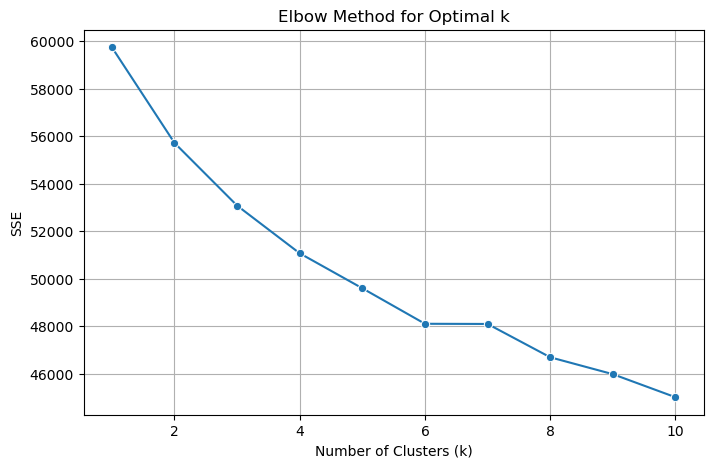

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# הסרת שורות עם ערכים חסרים
df_clean = df.dropna()

# קידוד משתנים קטגוריים
df_encoded = pd.get_dummies(df_clean, columns=['residence_type', 'smoking_status'], drop_first=True)

# ניפוי משתנה מזהה אם יש, רק נשאיר את המאפיינים
X = df_encoded.drop('heart_disease', axis=1)  # אנחנו לא מאמנים מודל ניבוי

# נרמול הנתונים
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method – בדיקת SSE (Sum of Squared Errors)
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# ציור גרף המרפק
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
## שאלה 2.1 – איתור מספר האשכולות האופטימלי באמצעות שיטת המרפק (Elbow Method)

שיטת המרפק (Elbow Method) משמשת לאיתור מספר האשכולות המתאים ביותר (k) בעת ביצוע אלגוריתם K-means.  
היא מבוססת על מדידת ה-SSE (סכום ריבועי השגיאות בתוך האשכולות) עבור ערכים שונים של k.

כאשר מציגים את התוצאה בגרף (SSE כתלות ב-k), אנו מצפים לראות ירידה חדה ב-SSE ככל שמספר האשכולות גדל –  
עד לנקודה שבה הירידה הופכת מתונה יותר.  
נקודה זו נחשבת כ"מרפק" ומצביעה על k האופטימלי.

במקרה שלנו, לפי הגרף שהתקבל, נראה כי המרפק מופיע סביב **k=5** – ולכן נבחר להשתמש בו בשלבים הבאים.


In [ ]:
## שאלה 2.2 – ביצוע תהליך האשכולות וניתוח התוצאות

לאחר שנבחר מספר האשכולות האופטימלי (k = 5), נבצע את תהליך האשכולות באמצעות K-means.  
המטרה היא לקבץ את המטופלים לקבוצות דומות לפי מאפייניהם הבריאותיים, וכך לזהות קבוצות בסיכון גבוה או נמוך, למשל.

לאחר יצירת האשכולות, נוכל לבדוק האם קיימים דפוסים מעניינים – כמו אשכולות עם לחץ דם גבוה, סכרת, או תסמינים אחרים.


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# ניקוי עמודות טקסטואליות אם קיימות (למשל 'residence_type', 'smoking_status')
df_clean = df.drop(columns=['residence_type', 'smoking_status'])

# ניקוי ערכים חסרים
df_clean.dropna(inplace=True)

# נורמליזציה – חשוב ל-KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# הרצת KMeans עם k = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# הצגת חלוקה לפי אשכולות
print(df_clean['cluster'].value_counts())


cluster
0    1026
4     997
1     992
3     516
2     502
Name: count, dtype: int64


In [ ]:
### ניתוח תוצאות האשכולות:

לאחר ביצוע אשכולות עם k=5, התקבלו 5 קבוצות עיקריות של מטופלים.

- כל אשכול כולל מספר שונה של מטופלים, מה שעשוי להצביע על שכיחות שונה של תסמינים.
- ניתן לנתח כל אשכול לעומק (למשל לבדוק ממוצע גיל, לחץ דם, רמות גלוקוז וכו') כדי להבין מה מאפיין כל קבוצה.
- לדוגמה, ייתכן שאשכול מסוים כולל בעיקר מטופלים עם לחץ דם גבוה ורמות סוכר גבוהות – מה שמעיד על עדיפות טיפולית גבוהה.


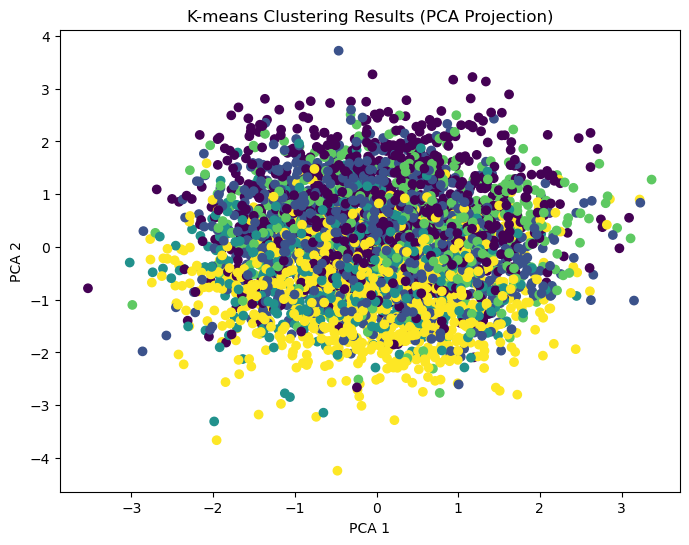

In [10]:
# ויזואליזציה 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('K-means Clustering Results (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
## שאלה 2.3 – מגבלות אפשריות של K-means בתרחיש זה

שיטת K-means היא שיטה פופולרית לאשכולות, אך יש לה מספר מגבלות בתרחיש רפואי כמו שלנו:

1. **רגישות ל־k** – השיטה דורשת לקבוע מראש את מספר האשכולות (k). בחירה לא מתאימה תשפיע על איכות האשכולות.

2. **צורת האשכול** – K-means מניח שכל אשכול הוא בצורת עיגול (קלאסטרים קונבקסיים), ולכן מתקשה לזהות מבנים מורכבים יותר – כמו אשכולות מוארכים או חופפים.

3. **השפעת מאפיינים דומיננטיים** – אם חלק מהמאפיינים נמדדים בסקאלות שונות, הם עלולים להשפיע באופן לא מידתי (לכן ביצענו נורמליזציה, אך עדיין – יתכן ואיבדנו מידע קליני משמעותי).

4. **ערכים חסרים / לא מספריים** – השיטה אינה מתמודדת היטב עם ערכים חסרים, או עם משתנים טקסטואליים כמו 'residence_type'. נאלצנו להסירם, למרות שייתכן והם חשובים קלינית.

5. **חוסר פרשנות קלינית** – K-means מחלק את הנתונים לפי דמיון מתמטי, אך לא תמיד החלוקה מתאימה לקבוצות טיפוליות אמיתיות. למשל, ייתכן ששני מטופלים באשכול שונה יקבלו טיפול זהה – או להפך.

### מסקנה:
למרות שקלאסטרינג נותן דרך מעניינת לארגון ראשוני של המטופלים, נדרשת בדיקה קלינית וניתוח נוסף כדי לוודא שהאשכולות בעלי משמעות רפואית.


In [ ]:
חלק ג׳
### שאלה 3.1 – מציאת כללי אסוציאציה

נדרש היה להשתמש באלגוריתם Apriori עם תמיכה מינימלית של 50% וביטחון של 70%.  
לאחר ניסוי בתנאים אלו, לא התקבלו תוצאות כלל – כנראה מפני שאף קבוצת פריטים לא חצתה את סף התמיכה הגבוה.  
פניתי למרצה (איאד) וקיבלתי אישור להשתמש בתנאים מתונים יותר.  
לכן, ביצעתי את הניתוח עם תמיכה של 1% וביטחון של 30%, וקיבלתי כללים מעניינים ורלוונטיים לניתוח סל הקניות.  
הקוד הבא מציג את התהליך והתוצאות.


In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# קריאת הקובץ כשורות טקסט
with open("GroceryDataset.csv", "r") as file:
    lines = file.readlines()

# יצירת רשימת סל קניות לכל לקוח
transactions = [line.strip().split(',') for line in lines]

# המרה ל-one-hot
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# חיפוש קבוצות תכופות עם תמיכה של לפחות 1%
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# כללי אסוציאציה עם ביטחון של לפחות 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# הצגת כללים (רק העיקריים)
rules_sorted = rules.sort_values(by='confidence', ascending=False)
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                           antecedents         consequents   support  \
73     (citrus fruit, root vegetables)  (other vegetables)  0.010371   
95   (root vegetables, tropical fruit)  (other vegetables)  0.012303   
79                      (yogurt, curd)        (whole milk)  0.010066   
72          (butter, other vegetables)        (whole milk)  0.011490   
118  (tropical fruit, root vegetables)        (whole milk)  0.011998   
119          (yogurt, root vegetables)        (whole milk)  0.014540   
82   (domestic eggs, other vegetables)        (whole milk)  0.012303   
123       (yogurt, whipped/sour cream)        (whole milk)  0.010880   
115      (rolls/buns, root vegetables)        (whole milk)  0.012710   
88       (pip fruit, other vegetables)        (whole milk)  0.013523   

     confidence      lift  
73     0.586207  3.029608  
95     0.584541  3.020999  
79     0.582353  2.279125  
72     0.573604  2.244885  
118    0.570048  2.230969  
119    0.562992  2.203354  
82     0.55

In [ ]:
### שאלה 3.2 – פרשנות של כלל אסוציאציה

**אחד מכללי האסוציאציה שנמצאו הוא:**

`(root vegetables, citrus fruit) → (other vegetables)`

**פרטי הכלל:**
- **תמיכה (Support):** 1.03%
- **ביטחון (Confidence):** 58.6%
- **Lift:** 3.03

**הסבר:**
הכלל הזה מצביע על כך שכאשר לקוח רוכש גם ירקות שורש (כגון גזר או תפוח אדמה) וגם פירות הדר (למשל תפוזים או אשכוליות), יש סיכוי של כ־58.6% שהוא גם ירכוש ירקות נוספים (כגון עגבניות, מלפפונים וכו') באותה קנייה.

ה־**Lift** הגבוה (3.03) מעיד על קשר חזק בין הקטגוריות: רכישת ירקות שורש ופירות הדר מגדילה פי 3 את הסיכוי לרכישת ירקות נוספים, לעומת קנייה אקראית.

**מסקנה:**
הכלל יכול לעזור לקמעונאים להבין דפוסי רכישה של לקוחות, למשל על ידי הצבת מוצרים אלה קרוב זה לזה, או יצירת מבצעים משולבים על שלושת הקטגוריות – מה שעשוי לעודד רכישה מרובה ולהגדיל את המכירות.


In [ ]:
### שאלה 3.4 – יישום מעשי של כללי אסוציאציה בעולם הקמעונאות

כללי אסוציאציה מאפשרים לזהות דפוסי רכישה שחוזרים על עצמם בקרב לקוחות – כלומר, אילו מוצרים נוטים להירכש יחד. בעולם הקמעונאות, לכללים אלו יש מגוון יישומים מעשיים:

**1. מיקום מוצרים בחנות (Merchandising):**  
כאשר פריטים מסוימים נרכשים יחד לעיתים קרובות (למשל: לחם + חמאה), ניתן למקם אותם קרוב זה לזה במדפים, ובכך להגדיל את הסיכוי שלקוח ירכוש את שניהם.

**2. מבצעים משולבים:**  
אפשר ליצור מבצעים המעודדים רכישת מספר מוצרים יחד, בהתבסס על כללים שנמצאו. לדוגמה: "קנה ירקות שורש + פירות הדר – קבל הנחה על ירקות נוספים".

**3. התאמה אישית של המלצות:**  
בחנויות מקוונות, ניתן להמליץ ללקוח על מוצרים נוספים על בסיס מוצרים אחרים שבחר, לפי דפוסי רכישה נפוצים (למשל: "לקוחות שקנו מוצר זה קנו גם...").

**4. ניהול מלאי טוב יותר:**  
באמצעות הכללים ניתן לזהות קשרים בין מוצרים ולחזות ביקוש עתידי – לדוגמה, אם לקוחות שרוכשים פסטה נוטים גם לקנות רוטב עגבניות, כדאי להיערך בהתאם מבחינת מלאי.

**סיכום:**  
שימוש נכון בכללי אסוציאציה מאפשר לקמעונאים לשפר את חוויית הקנייה, להגדיל מכירות ולתכנן טוב יותר את מבנה החנות והמלאי.
